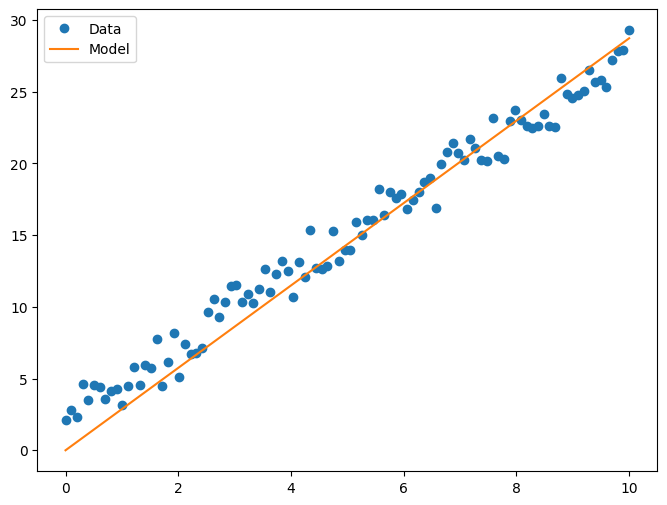

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.178e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                   9.90e-105
Time:                        20:30:00   Log-Likelihood:                         -184.06
No. Observations:                 100   AIC:                                      370.1
Df Residuals:                      99   BIC:                                      372.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 

def  get_data ():
    x = np.linspace (0,10,100)
    y = 2.6 * x + 2.0
    data = y + np.random.normal (0.0,1.0,[len(x)])
    return x, data 

def  get_data_nl ():
    x = np.linspace (0,10,100)
    y = 1.7 *x*x + 2.6 * x + 2.0
    data = y + np.random.normal (0.0,5.0,[len(x)])
    return x, data 



if __name__ == "__main__":

    x, y = get_data()
    
    mod = sm.OLS(y,x)
    res = mod.fit()
    yhat = res.predict(x)

    fig, axs = plt.subplots (1,1,figsize=(8,6))
    axs.plot(x,y,'o',label='Data')
    axs.plot(x,yhat,label='Model')
    axs.legend()
    plt.show()
    
    
    print(res.summary())
    print("Parameters: ", res.params)
    print("R2: ", res.rsquared)




# Non Linear  regression !

(100, 2)


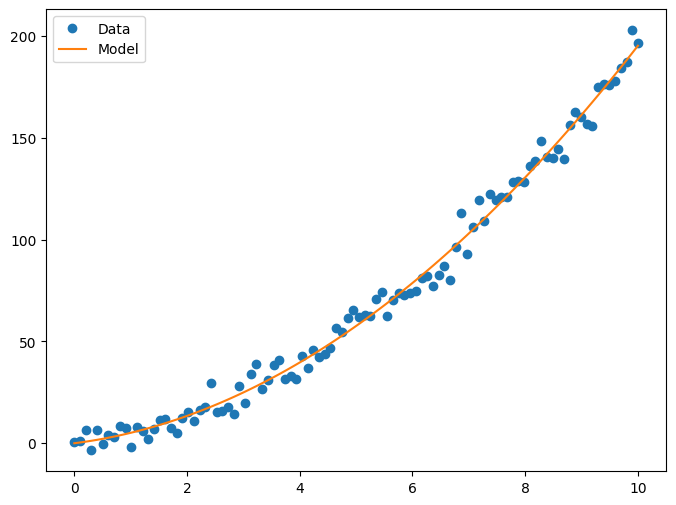

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.403e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                   3.49e-121
Time:                        20:30:02   Log-Likelihood:                         -311.17
No. Observations:                 100   AIC:                                      626.3
Df Residuals:                      98   BIC:                                      631.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
    x, y = get_data_nl()

    X = np.zeros ([len(x), 2])
    X[:,0] = x
    X[:,1] = x*x 

    print(X.shape)

    mod = sm.OLS(y,X)
    res = mod.fit()
    yhat = res.predict(X)

    red_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]



    fig, axs = plt.subplots (1,1,figsize=(8,6))
    axs.plot(x,y,'o',label='Data')
    axs.plot(x,yhat,label='Model')
    axs.legend()
    plt.show()
    
    
    print(res.summary())
    print("Parameters: ", res.params)
    print("R2: ", res.rsquared)


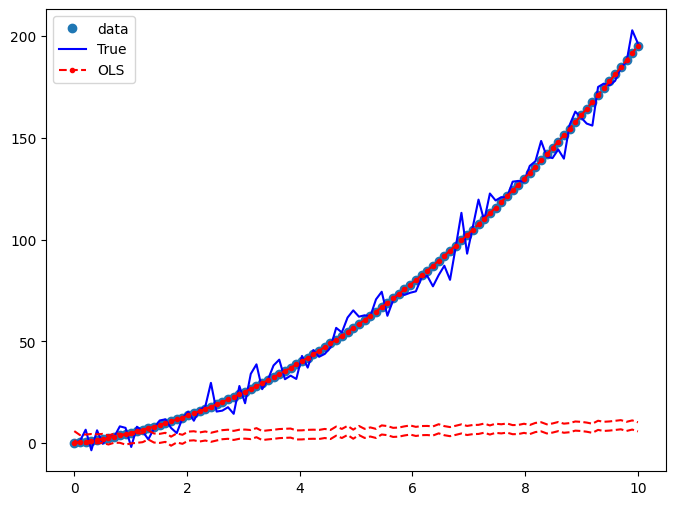

In [42]:
    red_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]


    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(x, yhat, "o", label="data")
    ax.plot(x, y, "b-", label="True")
    ax.plot(x, res.fittedvalues, "r--.", label="OLS")
    ax.plot(x, iv_u, "r--")
    ax.plot(x, iv_l, "r--")
    ax.legend(loc="best")